In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np


# All the functions to simulate a random walk

In [ ]:
def sample_next_step(current_i, current_j, sigma_i, sigma_j, context_map, random_state=np.random):
    """ Sample a new position for the walker. """

    # Combine the next-step proposal with the context map to get a next-step probability map
    size = context_map.shape[0]
    next_step_map = next_step_proposal(current_i, current_j, sigma_i, sigma_j, size)
    next_step_probability = compute_next_step_probability(next_step_map, context_map)

    # Draw a new position from the next-step probability map
    r = random_state.rand()
    cumulative_map = np.cumsum(next_step_probability)
    cumulative_map = cumulative_map.reshape(next_step_probability.shape)
    i_next, j_next = np.argwhere(cumulative_map >= r)[0]

    return i_next, j_next


def next_step_proposal(current_i, current_j, sigma_i, sigma_j, size):
    """ Create the 2D proposal map for the next step of the walker. """
    # 2D Gaussian distribution , centered at current position,
    # and with different standard deviations for i and j
    grid_ii, grid_jj = np.mgrid[0:size, 0:size]
    rad = (
        (((grid_ii - current_i) ** 2) / (sigma_i ** 2))
        + (((grid_jj - current_j) ** 2)/ (sigma_j ** 2))
    )
    p_next_step = np.exp(-(rad / 2.0)) / (2.0 * np.pi * sigma_i * sigma_j)
    return p_next_step / p_next_step.sum()


def compute_next_step_probability(next_step_map, context_map):
    """ Compute the next step probability map from next step proposal and context map. """
    next_step_probability = next_step_map * context_map
    next_step_probability /= next_step_probability.sum()
    return next_step_probability


def create_context_map(size, map_type='flat'):
    """ Create a fixed context map. """
    if map_type == 'flat':
        context_map = np.ones((size, size))
    elif map_type == 'hills':
        grid_ii, grid_jj = np.mgrid[0:size, 0:size]
        i_waves = np.sin(grid_ii/130) + np.sin(grid_ii/10)
        i_waves /= i_waves.max()
        j_waves = np.sin(grid_jj/100) + np.sin(grid_jj/50)+ np.sin(grid_jj/10)
        j_waves /= j_waves.max()
        context_map = j_waves+i_waves
    elif map_type == 'labyrinth':
        context_map = np.ones((size, size))
        context_map[50:100, 50:60] = 0
        context_map[20:89, 80:90] = 0
        context_map[90:120, 0:10] = 0
        context_map[120:size, 30:40] = 0
        context_map[180:190, 50:60] = 0

        context_map[50:60, 50:200] = 0
        context_map[179:189, 80:130] = 0
        context_map[110:120, 0:190] = 0
        context_map[120:size, 30:40] = 0
        context_map[180:190, 50:60] = 0
    context_map /= context_map.sum()
    return context_map


def plot_trajectory(trajectory, context_map):
    """ Plot a trajectory over a context map. """
    trajectory = np.asarray(trajectory)
    plt.matshow(context_map)
    plt.plot(trajectory[:, 1], trajectory[:, 0], color='r')
    plt.show()


# Examples of how the code works

In [ ]:
# `next_step_proposal` creates a map of the probability of
# ending up in any position, given the current position, some map
# parameters, and the size of the map
proposal = next_step_proposal(current_i=100, current_j=50, sigma_i=10, sigma_j=5, size=200)
plt.matshow(proposal)

In [ ]:
# `create_context_map` creates a context map that tell us regions
# in the image with higher probablity (e.g., very bright spots in an image)
context_map = create_context_map(size=150, map_type='hills')
plt.matshow(context_map)
plt.colorbar()

# How to simulate a trajectory

In [ ]:
i, j = 100, 50  # initial position
sigma_i, sigma_j = 3, 4  # parameters of the next step map
size = 200  # size of the image
context_map = create_context_map(size, 'hills')  # fixed context map

# Sample a next step 1000 times
trajectory = []
for _ in range(1000):
    i, j = sample_next_step(i, j, sigma_i, sigma_j, context_map)
    trajectory.append((i, j))

In [ ]:
plot_trajectory(trajectory, context_map)


# How to simulate a trajectory

In [11]:
i, j = 100, 50  # initial position
sigma_i, sigma_j = 3, 4  # parameters of the next step map
size = 200  # size of the image
context_map = create_context_map(size, 'hills')  # fixed context map

# Sample a next step 1000 times
trajectory = []
for _ in range(1000):
    i, j = sample_next_step(i, j, sigma_i, sigma_j, context_map)
    trajectory.append((i, j))

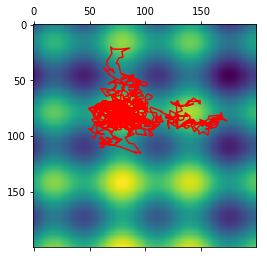

In [12]:
plot_trajectory(trajectory, context_map)
